In [1]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

#time
from datetime import datetime, timedelta
import time

#matlab import
import scipy.io
from scipy.io import savemat

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

from nanodrivers.visa_drivers.vna import VNA

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
vna = VNA(device_num="TCPIP0::169.254.36.111::hislip0::INSTR")
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [3]:
vna.set_freq_start_stop(3.4e9, 4e9, 10001)
vna.set_power(-10)

In [8]:
mag, pha = vna.get_data()

In [9]:
freq = vna.get_freq()

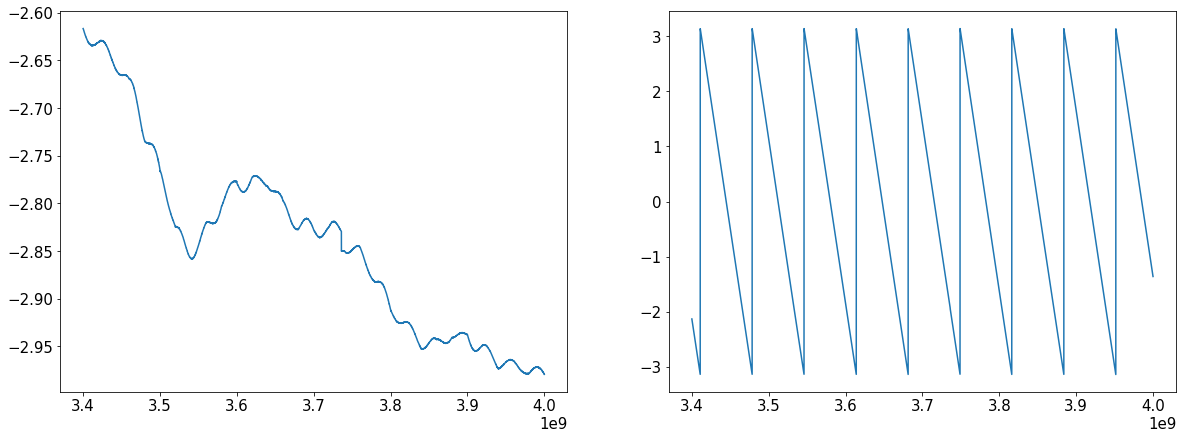

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
ax[0].plot(freq, mag)
ax[1].plot(freq, pha)

In [4]:
vna.set_band(100)
vna.set_power(10)

mag_line, pha_line = vna.get_data()

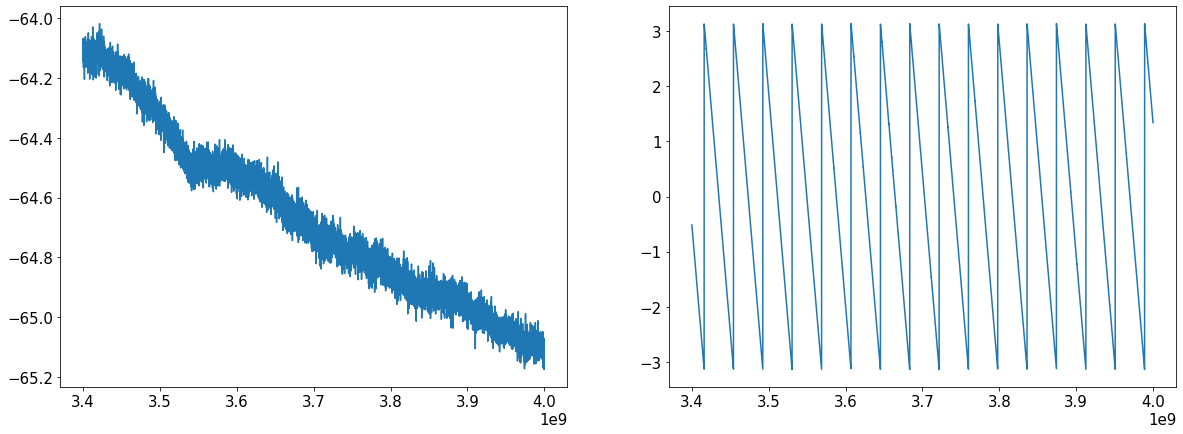

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
ax[0].plot(freq, mag_line)
ax[1].plot(freq, pha_line)

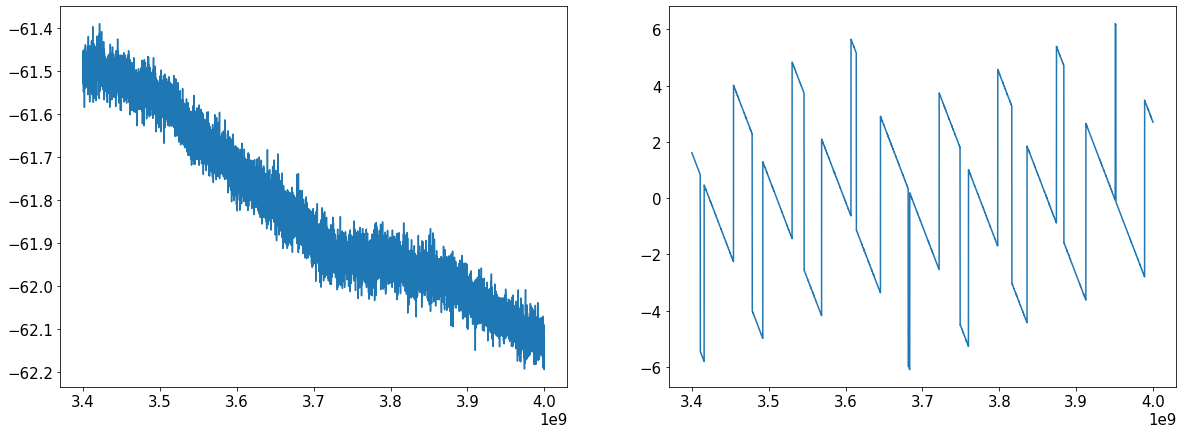

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
ax[0].plot(freq, mag_line-mag)
ax[1].plot(freq, pha_line-pha)

plt.savefig(r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi2_shield2\Line_calibration\line_calibration.PNG')

In [12]:
state=dict()
state['temp'] = 295

state['dump_vna'] = vna.dump()
state['mag_ref_cable'] = mag
state['pha_ref_cable'] = pha
state['mag_line'] = mag_line
state['pha_line'] = pha_line
state['mag_total'] = mag_line-mag
state['pha_total'] = pha_line-pha
state['freq'] = freq


now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi2_shield2\Line_calibration'
file = r'Room_T_line_calibration_'+ now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

savemat(file_name, state)